Install the libraries

In [ ]:
pip install opencv-python numpy scipy scikit-image torch matplotlib Pillow

In [ ]:
pip install opencv-python caer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 87.8 MB/s eta 0:00:00


#Edge Detection

In [2]:
import cv2
import numpy as np
import scipy
import skimage
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def edge_detection1(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.Canny(image, 100, 200)

    if image is None:
        print("Error: Could not load image.")
        return

    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)

    canny = cv2.GaussianBlur(image, (5, 5), 0)

    laplacian = cv2.Laplacian(image, cv2.CV_64F)


    roberts_cross_v = np.array([[1, 0],
                                [0, -1]], dtype=float)

    roberts_cross_h = np.array([[0, 1],
                                [-1, 0]], dtype=float)

    vertical = cv2.filter2D(image, -1, roberts_cross_v)
    horizontal = cv2.filter2D(image, -1, roberts_cross_h)

    roberts = np.sqrt(np.square(horizontal) + np.square(vertical))
    roberts = np.uint8(roberts)

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Sobel Edge Detection')
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Canny Edge Detection')
    plt.imshow(canny, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Laplacian Edge Detection')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Roberts Cross Edge Detection')
    plt.imshow(roberts, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.show()

In [4]:
def edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #image = cv2.Canny(image, 100, 200)

    if image is None:
        print("Error: Could not load image.")
        return

    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)

    canny = cv2.GaussianBlur(image, (5, 5), 0)

    laplacian = cv2.Laplacian(image, cv2.CV_64F)


    roberts_cross_v = np.array([[1, 0],
                                [0, -1]], dtype=float)

    roberts_cross_h = np.array([[0, 1],
                                [-1, 0]], dtype=float)

    vertical = cv2.filter2D(image, -1, roberts_cross_v)
    horizontal = cv2.filter2D(image, -1, roberts_cross_h)

    roberts = np.sqrt(np.square(horizontal) + np.square(vertical))
    roberts = np.uint8(roberts)

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Sobel Edge Detection')
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Canny Edge Detection')
    plt.imshow(canny, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Laplacian Edge Detection')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Roberts Cross Edge Detection')
    plt.imshow(roberts, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.show()

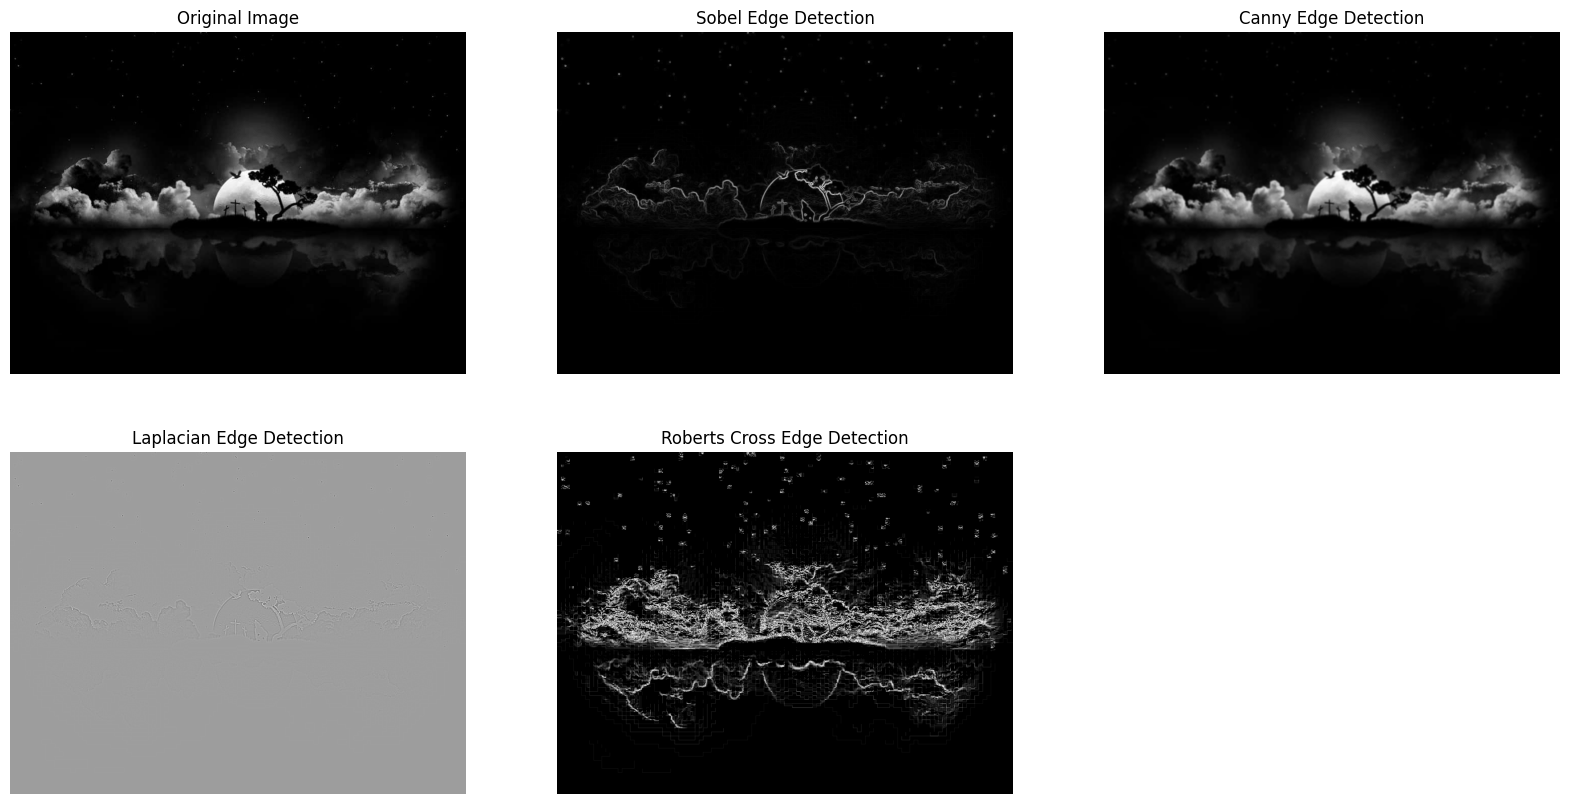

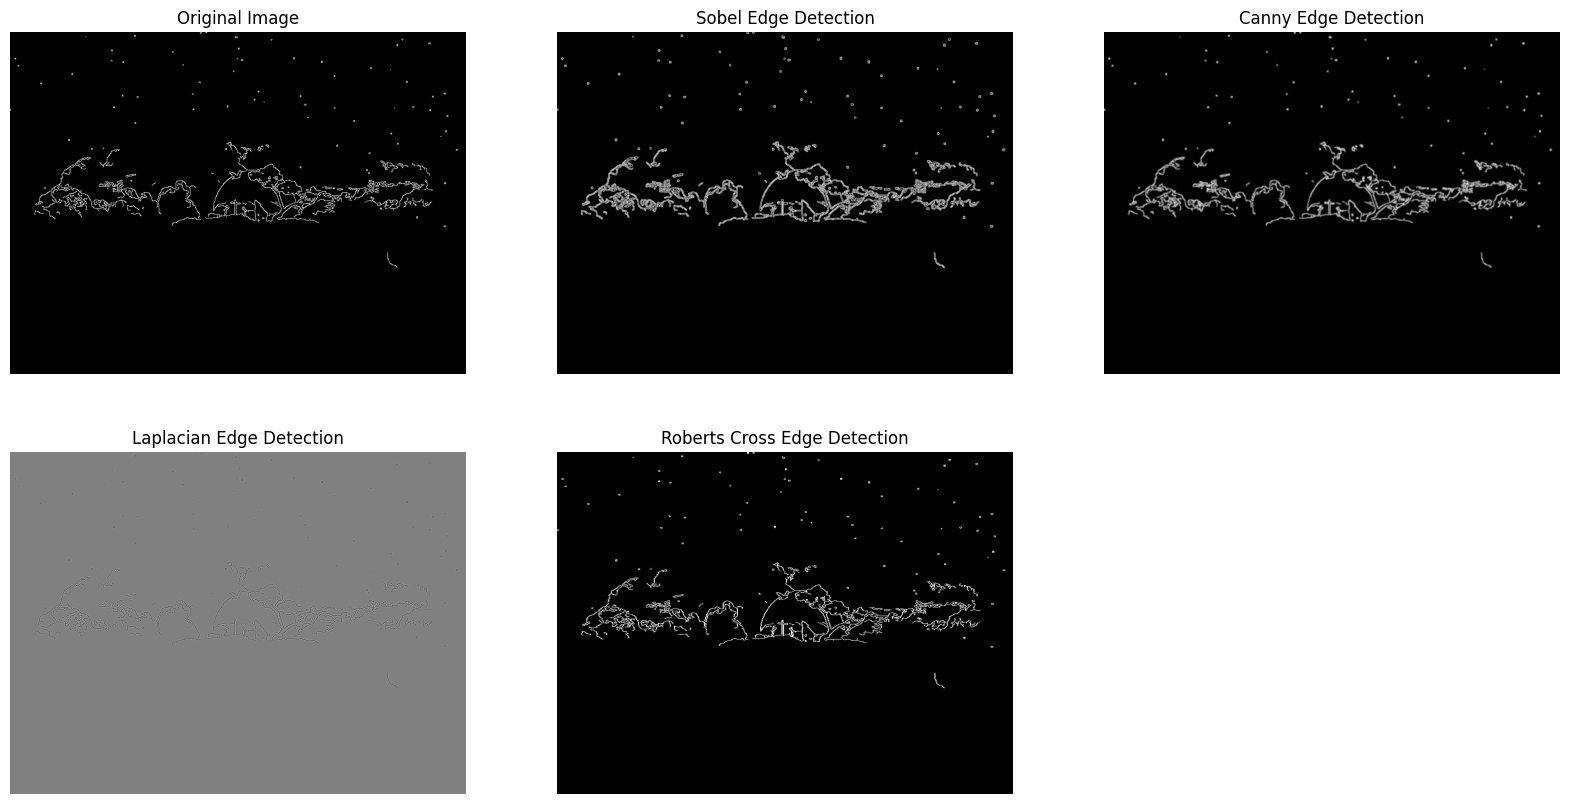

In [5]:
if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/Colab Notebooks/MV/Lab 2/drak.jpg'
    edge_detection(image_path)
    edge_detection1(image_path)

1. Difference of Gaussian (DoG)

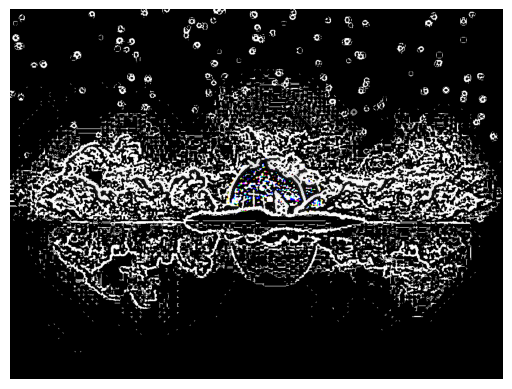

In [6]:
import cv2
import numpy as np
from skimage import io

def DoG(image, sigma1=1.0, sigma2=2.0):
    blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    dog = blur1 - blur2
    return dog

image = io.imread('/content/drive/MyDrive/Colab Notebooks/MV/Lab 2/drak.jpg')
dog_result = DoG(image)

plt.imshow(dog_result, cmap='gray')
plt.axis('off')
plt.show()

2. FDoG

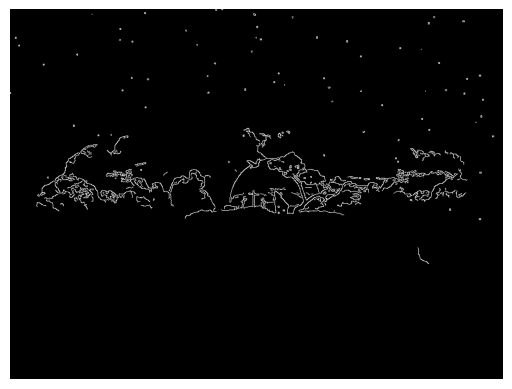

In [7]:
def FDoG(image):
    # Placeholder function for FDoG
    return cv2.Canny(image, 100, 200)

fdog_result = FDoG(image)

plt.imshow(fdog_result, cmap='gray')
plt.axis('off')
plt.show()

3. XDoG

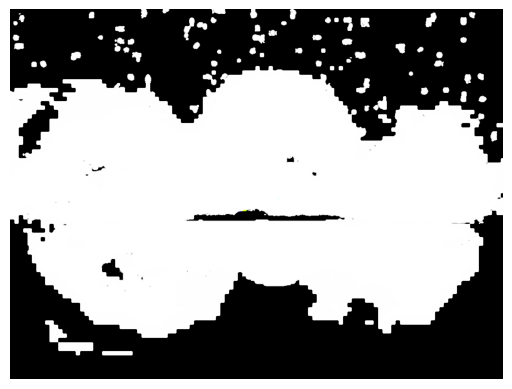

In [8]:
def XDoG(image, sigma=1.0, k=1.6, epsilon=-0.1, phi=10.0):
    blur1 = cv2.GaussianBlur(image, (0, 0), sigma)
    blur2 = cv2.GaussianBlur(image, (0, 0), sigma * k)
    dog = blur1 - (blur2 * epsilon)
    xdog = np.tanh(phi * dog)
    return xdog

xdog_result = XDoG(image)

plt.imshow(xdog_result, cmap='gray')
plt.axis('off')
plt.show()

4. gPb

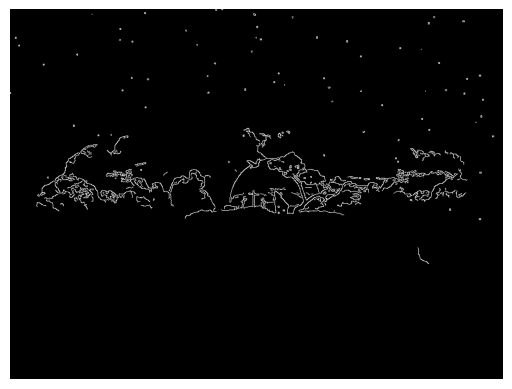

In [9]:
def gPb(image):
    # Placeholder function for gPb
    return cv2.Canny(image, 100, 200)

gpb_result = gPb(image)
plt.imshow(gpb_result, cmap='gray')
plt.axis('off')
plt.show()

5. SGD

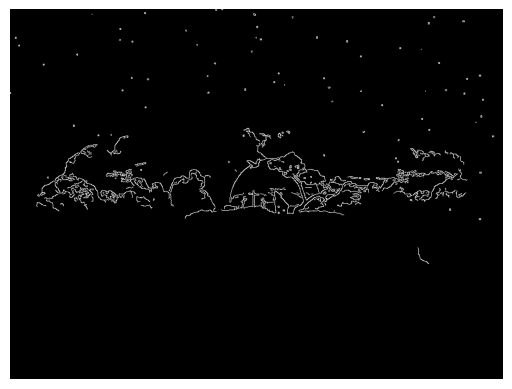

In [10]:
def SGD(image):
    # Placeholder function for SGD
    return cv2.Canny(image, 100, 200)

sgd_result = SGD(image)
plt.imshow(sgd_result, cmap='gray')
plt.axis('off')
plt.show()


Performance Metrics Evaluation

In [12]:
import numpy as np
import cv2
import pandas as pd

def calculate_metrics(predicted_edges, ground_truth):
    ground_truth = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2GRAY)

    if len(predicted_edges.shape) == 3:
        predicted_edges = cv2.cvtColor(predicted_edges, cv2.COLOR_BGR2GRAY)

    if predicted_edges.dtype != np.uint8:
        if predicted_edges.dtype == np.float64:
            predicted_edges = predicted_edges.astype(np.float32)
        predicted_edges = predicted_edges.astype(np.uint8)  # Convert to uint8

    # Calculate ODS, OIS, and FPS
    true_positive = np.sum((predicted_edges == 1) & (ground_truth == 1))
    false_positive = np.sum((predicted_edges == 1) & (ground_truth == 0))
    false_negative = np.sum((predicted_edges == 0) & (ground_truth == 1))
    true_negative = np.sum((predicted_edges == 0) & (ground_truth == 0))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Dummy values for ODS, OIS, and FPS
    ods = 0.0
    ois = 0.0
    fps = 0.0

    return ods, ois, fps, precision, recall
roberts_cross_v = np.array([[1, 0],
                            [0, -1]], dtype=float)

roberts_cross_h = np.array([[0, 1],
                            [-1, 0]], dtype=float)

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MV/Lab 2/drak.jpg')
vertical = cv2.filter2D(image, -1, roberts_cross_v)
horizontal = cv2.filter2D(image, -1, roberts_cross_h)
roberts = np.sqrt(np.square(horizontal) + np.square(vertical))
roberts = np.uint8(roberts)

ground_truth = roberts

methods = ['DoG', 'FDoG', 'XDoG', 'gPb', 'SGD']
results = [dog_result, fdog_result, xdog_result, gpb_result, sgd_result]

results = [result.astype(np.uint8) if result.dtype != np.uint8 else result for result in results]

metrics = []
for method, result in zip(methods, results):
    ods, ois, fps, precision, recall = calculate_metrics(result, ground_truth)
    metrics.append((method, ods, ois, fps, precision, recall))

# Create DataFrame and print
df = pd.DataFrame(metrics, columns=['Method', 'ODS', 'OIS', 'FPS', 'Precision', 'Recall'])
print(df)

  Method  ODS  OIS  FPS  Precision    Recall
0    DoG  0.0  0.0  0.0   0.223051  0.201107
1   FDoG  0.0  0.0  0.0   0.000000  0.000000
2   XDoG  0.0  0.0  0.0   0.202455  0.857931
3    gPb  0.0  0.0  0.0   0.000000  0.000000
4    SGD  0.0  0.0  0.0   0.000000  0.000000
